In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

## Part a

In [2]:
D = 15
rho = 7.8
v_i = 300
angle= 50
gamma = .25
lambd = 10000
v_ix = v_i* np.cos(np.radians(angle))
v_iy = v_i*np.sin(np.radians(angle))
t_i = 0
t_f = 3.5
#find mass of ball
# rho = m/V => m = V * rho = (4/3 pi r^3) 
mass = rho*((4/3) * np.pi * (D/2)**3)/1000
vls=[0,0,v_ix,v_iy]
t= np.linspace(t_i,t_f, 1000)


In [3]:
def proj_vac(time, vals):
    x,y,v_x,v_y = vals
    dxdt = v_x
    dydt = v_y
    dvxdt =0
    dvydt=-1*mass*9.8
    return np.array([dxdt,dydt,dvxdt,dvydt])

In [4]:
gen_sol= integrate.solve_ivp(proj_vac,(t_i,t_f),vls, method='RK45',t_eval = t)

x_t= gen_sol.y[0]
y_t=gen_sol.y[1]

The Horizontal range is: 674.9269901708674


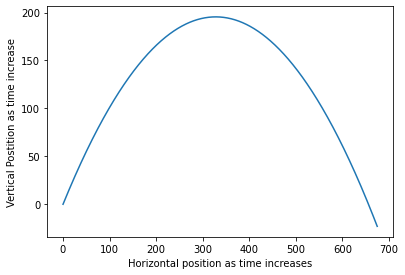

In [26]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(x_t,y_t)
hor_range = x_t[-1]
axes.set_xlabel("Horizontal position as time increases")
axes.set_ylabel("Vertical Postition as time increase")
print("The Horizontal range is:", hor_range)

## Part b

In [6]:
def rk4(f,ti,x0):
    n = len(ti)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range(0,n-1):
        dt = ti[i+1]-ti[i]
        k1 = f(ti[i],x[i])
        k2 = f(ti[i] + dt/2.0, x[i] + (dt/2.0) *k1)
        k3 = f(ti[i] + dt/2.0, x[i] + (dt/2.0)*k2 )
        k4 = f(ti[i] + dt, x[i] + dt*k3)
        x[i+1] = x[i] + dt/6*(k1 + (2*k2) + (2*k3) + k4)
    return x

gen_sol_rk = rk4(proj_vac,t,vls)
x_t_rk = gen_sol_rk[:,0]
y_t_rk = gen_sol_rk[:,1]

The Runge-kutta order 4 function is a very good approx.


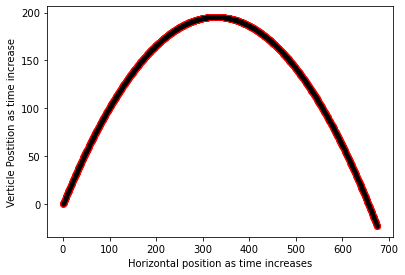

In [21]:
fig2 = plt.figure()
axes2 = fig2.add_axes([.1,.1,.8,.8])
axes2.plot(x_t_rk,y_t_rk,'o', color= "red")
axes2.plot(x_t,y_t,'.', color= "black");
axes2.set_xlabel("Horizontal position as time increases")
axes2.set_ylabel("Vertical Postition as time increase")
print("The Runge-kutta order 4 function is a very good approx.")

## Part c

In [35]:
drag = lambda y, v: (gamma * (D**2)/(100**2) * np.exp(-y / lambd))*v**2
drag_x = lambda v: ((gamma * (D**2))/(100**2))*v**2
def proj_res(tim, valss):
    x, y, v_xr, v_yr = valss
    dxdt = v_xr 
    dydt = v_yr
    dvxdt = -drag_x(dxdt)
    dvydt = -mass* 9.8 - drag_x(dydt)
    if y < 0:
        return np.zeros(4)
    return np.array([dxdt, dydt, dvxdt, dvydt])


In [36]:
gen_sol_res= integrate.solve_ivp(proj_res,(t_i,t_f),vls, method='RK45',t_eval = t)

x_t_res= gen_sol_res.y[0]
y_t_res=gen_sol_res.y[1]

The horizontal range is: 219.3405017904211


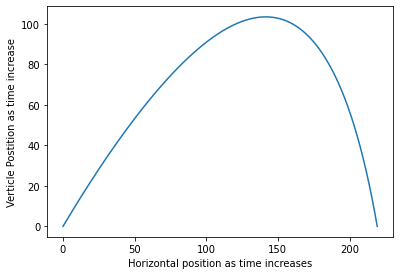

In [37]:
fig3 = plt.figure()
axes3 = fig3.add_axes([0.1,0.1,0.8,0.8])    
axes3.plot(x_t_res, y_t_res)
axes3.set_xlabel("Horizontal position as time increases")
axes3.set_ylabel("Verticle Postition as time increase")
hor_range2 = x_t_res[-1]
print("The horizontal range is:", hor_range2)


## Part d

In [41]:
def proj_res2(t, vals):
    x,y,v_x,v_y = vals
    dxdt = v_x
    dydt = v_y
    dvxdt = - drag(x,v_x)
    dvydt = -mass * 9.8 - drag(y,v_y)
    if y<0:
        return np.zeros(4)
    return np.array([dxdt,dydt,dvxdt,dvydt])

In [42]:
gen_sol_res2= integrate.solve_ivp(proj_res2,(t_i,t_f),vls, method='RK45',t_eval = t)

x_t_res2= gen_sol_res2.y[0]
y_t_res2=gen_sol_res2.y[1]

The horizontal range is: 220.24564406409866


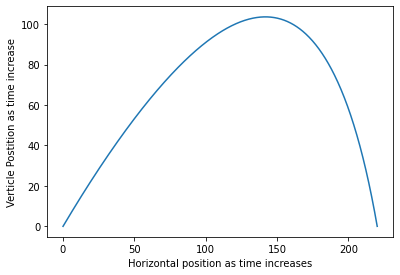

In [43]:
fig4 = plt.figure()
axes4 = fig4.add_axes([0.1,0.1,0.8,0.8])
axes4.plot(x_t_res2,y_t_res2)

hor_range3 = x_t_res2[-1]
axes4.set_xlabel("Horizontal position as time increases")
axes4.set_ylabel("Verticle Postition as time increase")
print("The horizontal range is:",hor_range3)

## part e

Text(0, 0.5, 'Verticle Postition as time increase')

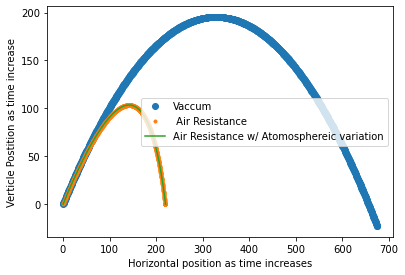

In [44]:
fig5 = plt.figure()
axes5 = fig5.add_axes([0.1,0.1,0.8,0.8])
axes5.plot(x_t,y_t,'o', label= "Vaccum")
axes5.plot(x_t_res,y_t_res,'.', label=" Air Resistance")
axes5.plot(x_t_res2,y_t_res2,'-', label= "Air Resistance w/ Atomosphereic variation")
axes5.legend();
axes5.set_xlabel("Horizontal position as time increases")
axes5.set_ylabel("Verticle Postition as time increase")

The horizontal range is just slightly less for turning on just air resistance than it is for turning on the variation with atmosphere.

The horizontal range for the air resistance c(0)= 219.34
while the horizontal range for c(y)=  220.25